# My First attempt to use Deutsche Bahn open Data API
This notebook was created during a long train trip from Sete in France to Gothenburg in Sweden. One of the legs between Düsseldorf and Hamburg in Germany was examined below, using the Deutsche Bahn API. 

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 20)
import requests
import pandas as pd
import geopandas as gpd
import numpy as np

You need an authorization key, I got a trial one by mailing: DBOpenData@deutschebahn.com
For real stuff I think you have to register: 

Für einen eigenen API-Key bitte im Developer-Portal registrieren: https://developer.deutschebahn.com/store/getting-started 
Und die Fahrplan-API abonnieren: https://developer.deutschebahn.com/store/apis/info?name=Fahrplan&version=v1&provider=DBOpenData

In [47]:
#My local key:
with open('DB_API_key.txt','r') as file:
    API_Key =  file.readline()

## Finding station id for Düsseldorf station:

In [3]:
params = {}
params['lang'] = 'en'
params['authKey'] = API_Key
params['input'] = 'Düsseldorf Hbf'
params['format'] ='json'
r = requests.get('https://open-api.bahn.de/bin/rest.exe/location.name',params = params)
result = r.json()
station = result['LocationList']['StopLocation'][0]
station

{'id': '008000085',
 'lat': '51.219960',
 'lon': '6.794317',
 'name': 'Düsseldorf Hbf'}

## Getting the departure board for Düsseldorf, for the time I'm leaving

In [48]:
params = {}
params['lang'] = 'en'
params['authKey'] = 'DBhackFrankfurt0316'
params['id'] = station['id']
params['date'] = '2017-10-14'
params['time'] = '20%0a30'
params['format'] ='json'
r = requests.get('https://open-api.bahn.de/bin/rest.exe/departureBoard',params = params)
result = r.json()
departure_board = result['DepartureBoard']['Departure']

In [5]:
df_departure_board = pd.DataFrame(departure_board)
df_departure_board.get_value(0,'JourneyDetailRef')

{'ref': 'https://open-api.bahn.de/bin/rest.exe/v1.0/journeyDetail?ref=526386%2F192417%2F380710%2F14893%2F80%3Fdate%3D2017-10-14%26station_evaId%3D8000085%26station_type%3Ddep%26authKey%3DDBhackFrankfurt0316%26lang%3Den%26format%3Djson%26'}

In [6]:
df_departure_board = pd.DataFrame(departure_board)
df_departure_board.head()

,JourneyDetailRef,date,direction,name,stop,stopid,time,track,tyoe,type,tyte
0,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Köln Hbf,ICE 846,Düsseldorf Hbf,8000085,20:08,16,NaN,ICE,NaN
1,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Dortmund Hbf,EC 114,Düsseldorf Hbf,8000085,20:11,18,NaN,EC,NaN
2,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Karlsruhe Hbf,ICE 605,Düsseldorf Hbf,8000085,20:18,16,NaN,ICE,NaN
3,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Frankfurt(Main)Hbf,IC 2315,Düsseldorf Hbf,8000085,20:27,16,NaN,IC,NaN
4,{'ref': 'https://open-api.bahn.de/bin/rest.exe...,2017-10-14,Dortmund Hbf,ICE 514,Düsseldorf Hbf,8000085,20:33,18,NaN,ICE,NaN


In [7]:
"""Correcting some errors in the API output"""
def merge_cols(df,target_col,other_col):
    if other_col in df:
        df[target_col] = df[target_col].fillna(df[other_col])
        df.drop(other_col,axis = 1,inplace = True)    
 
merge_cols(df_departure_board,'type','tyte')
merge_cols(df_departure_board,'type','tyoe')


In [8]:
df_departure_board.to_csv('departure_board.csv',sep = ';')

### This is (hopefully) what I will be seeing when I get to the Düsseldorf station:

In [49]:
df_departure_board.ix[:,(df_departure_board.columns != 'JourneyDetailRef') & (df_departure_board.columns != 'stopid')]

,date,direction,name,stop,time,track,type
0,2017-10-14,Köln Hbf,ICE 846,Düsseldorf Hbf,20:08,16,ICE
1,2017-10-14,Dortmund Hbf,EC 114,Düsseldorf Hbf,20:11,18,EC
2,2017-10-14,Karlsruhe Hbf,ICE 605,Düsseldorf Hbf,20:18,16,ICE
3,2017-10-14,Frankfurt(Main)Hbf,IC 2315,Düsseldorf Hbf,20:27,16,IC
4,2017-10-14,Dortmund Hbf,ICE 514,Düsseldorf Hbf,20:33,18,ICE
5,2017-10-14,Hamburg Hbf,ICE 26,Düsseldorf Hbf,20:39,NaN,ICE
6,2017-10-14,Frankfurt(Main)Hbf,ICE 221,Düsseldorf Hbf,20:48,16,ICE
7,2017-10-14,Wien Hbf (Autoreisezuganlage),EN 40421,Düsseldorf Hbf,20:54,19,EN
8,2017-10-14,Innsbruck Hbf,EN 421,Düsseldorf Hbf,20:54,19,EN
9,2017-10-14,Köln Hbf,ICE 544,Düsseldorf Hbf,21:08,16,ICE


## Getting journey details for my train (ICE 26)

In [32]:
index = df_departure_board['name'] == 'ICE 26'
line = df_departure_board.loc[index].iloc[0]

#This is how you get data about a specific journey:
r = requests.get(line['JourneyDetailRef']['ref'])
journey = r.json()['JourneyDetail']
df_journey = pd.DataFrame(journey['Stops']['Stop'])
df_journey

,arrDate,arrTime,depDate,depTime,id,lat,lon,name,routeIdx,track
0,NaN,NaN,2017-10-14,10:50,8103000,48.184923,16.375865,Wien Hbf,0,5A-C
1,2017-10-14,10:55,2017-10-14,10:57,8100514,48.174451,16.333085,Wien Meidling,1,5
2,2017-10-14,11:21,2017-10-14,11:23,8100008,48.208304,15.624672,St.Pölten Hbf,2,5
3,2017-10-14,12:13,2017-10-14,12:17,8100013,48.290178,14.292129,Linz Hbf,3,NaN
4,2017-10-14,12:31,2017-10-14,12:33,8100014,48.166082,14.026570,Wels Hbf,4,5
5,2017-10-14,13:18,2017-10-14,13:24,8000298,48.573635,13.450775,Passau Hbf,5,2
6,2017-10-14,13:56,2017-10-14,13:58,8000301,48.779622,12.863941,Plattling,6,4
7,2017-10-14,14:27,2017-10-14,14:29,8000309,49.011670,12.099615,Regensburg Hbf,7,5
8,2017-10-14,16:25,2017-10-14,16:27,8000260,49.801795,9.935777,Würzburg Hbf,8,4
9,2017-10-14,17:18,2017-10-14,17:20,8000150,50.120957,8.929003,Hanau Hbf,9,102


In [33]:
df_journey['lat'] = pd.to_numeric(df_journey['lat'])
df_journey['lon'] = pd.to_numeric(df_journey['lon'])

### take a slice that contains only stations that is within my journey

In [50]:
mask = df_journey['name'] == (line['stop'])
index = df_journey[mask].index[0]
df_journey = df_journey.loc[index:]
df_journey['arrDate'].iloc[0] = np.NaN
df_journey['arrTime'].iloc[0] = np.NaN


### convert the journey data frame to geopandas dataframe

In [51]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_journey.lon, df_journey.lat)]
df = df_journey.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [52]:
def create_date_strings(row,date_col,time_col):
    if not isinstance(row[date_col],str):
        return np.nan
    
    s = '%s %s' % (row[date_col],row[time_col])
    return s

def create_date(df,date_col,time_col):
    date_strings = df.apply(func = create_date_strings,axis = 1,args = (date_col,time_col))
    dates = pd.to_datetime(date_strings,format = "%Y-%m-%d %H:%M")
    return dates

geo_df['arrival'] = create_date(df = geo_df,date_col = 'arrDate',time_col = 'arrTime')
geo_df['departure'] = create_date(df = geo_df,date_col = 'depDate',time_col = 'depTime')
geo_df.drop(labels = ['arrDate','arrTime','depDate','depTime'],axis = 1,inplace=True)



In [53]:
geo_df.head()

,id,name,routeIdx,track,geometry,arrival,departure
16,8000085,Düsseldorf Hbf,16,NaN,POINT (6.794316999999999 51.21996),NaT,2017-10-14 20:39:00
17,8000080,Dortmund Hbf,17,10,POINT (7.459294 51.517899),2017-10-14 21:24:00,2017-10-14 21:27:00
18,8000263,Münster(Westf)Hbf,18,12,POINT (7.635716 51.956563),2017-10-14 21:54:00,2017-10-14 21:57:00
19,8000294,Osnabrück Hbf,19,3,POINT (8.061778 52.272849),2017-10-14 22:21:00,2017-10-14 22:24:00
20,8000050,Bremen Hbf,20,9,POINT (8.813833000000001 53.083478),2017-10-14 23:16:00,2017-10-14 23:19:00


## Plotting my journey

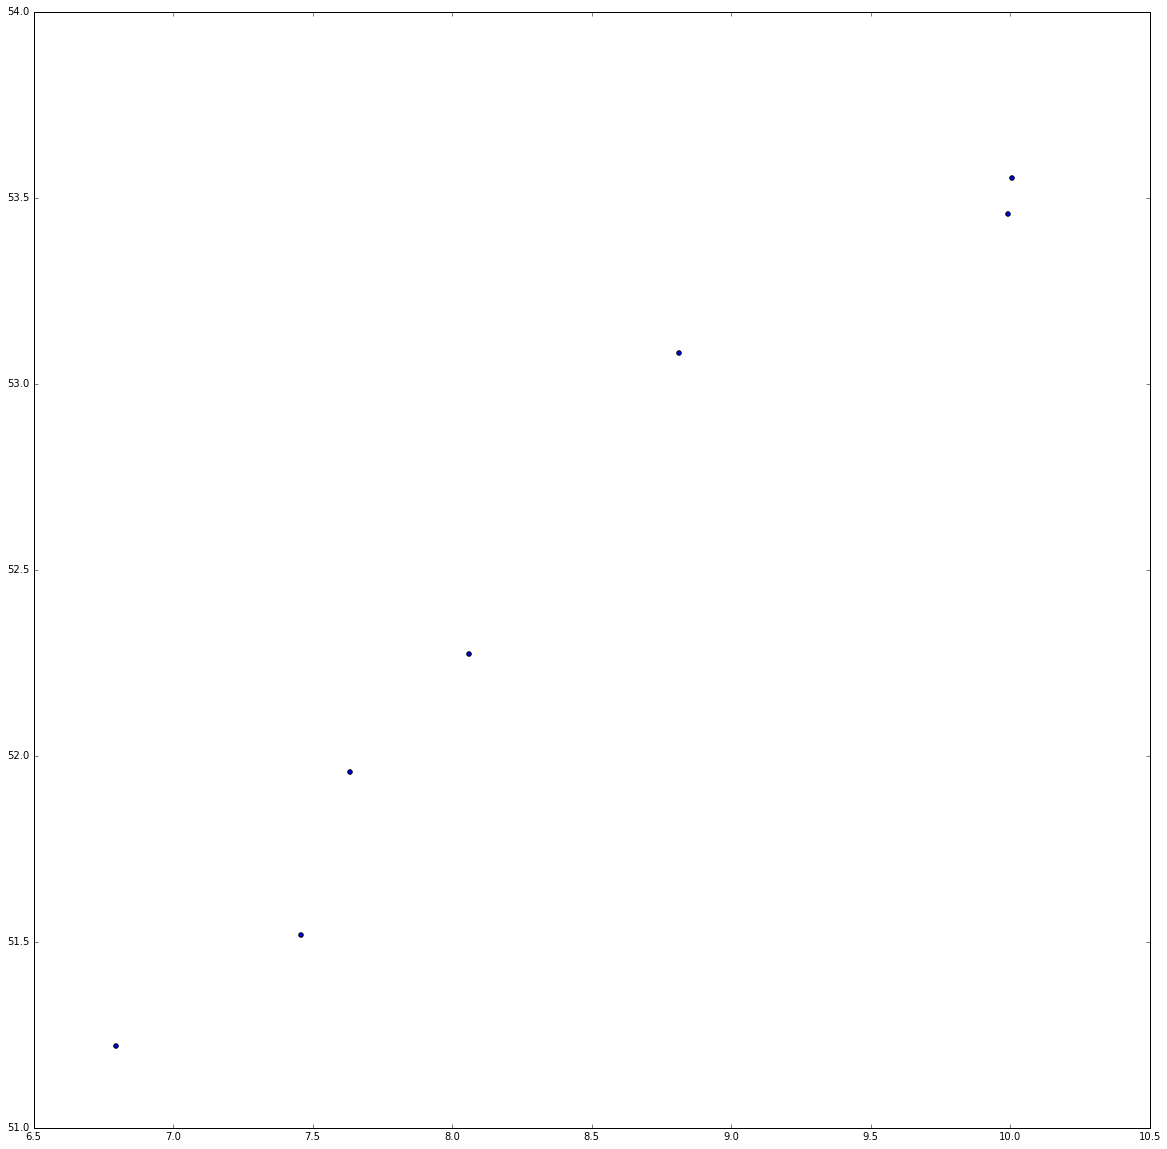

In [54]:
fig,ax = plt.subplots()
geo_df.plot(ax = ax)

In [55]:
#df_world_map = gpd.read_file(filename = 'simplified-land-polygons-complete-3857/simplified_land_polygons.shp')
df_world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


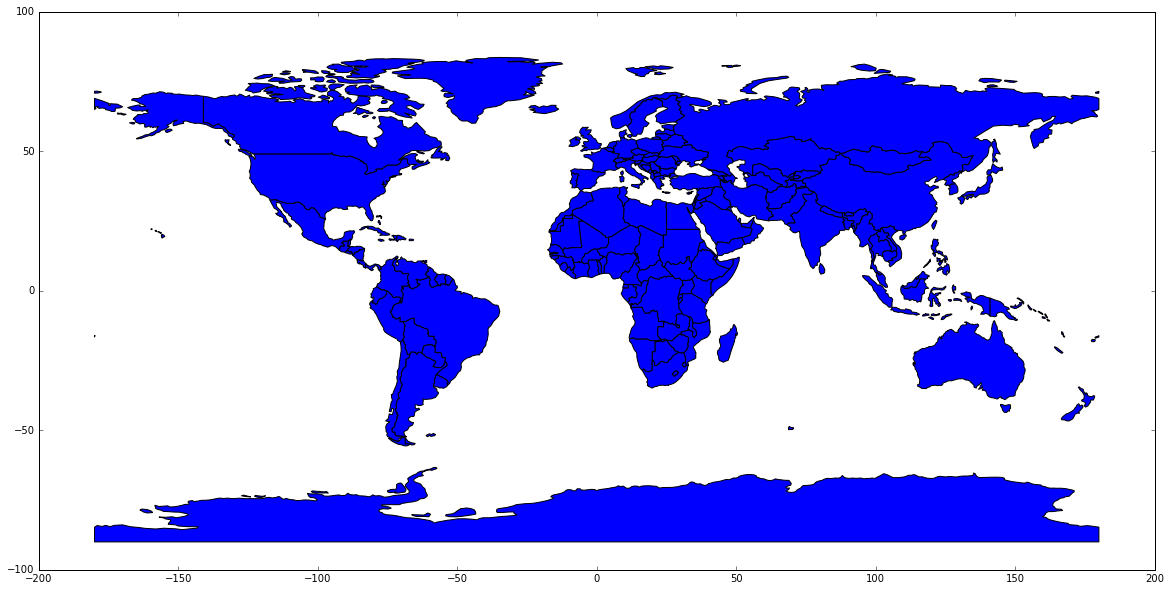

In [56]:
df_world_map.plot()

In [57]:
def plot_station_names(row,ax,times = True):
    
    point = row['geometry']
    coords = point.coords.xy
    
    x = coords[0][0]
    y = coords[1][0]
    
    name = '  %s' % row['name']
    
    if times:
        
        arrival = row['arrival']
        departure = row['departure']
        
        if arrival is pd.NaT:
            #Start of journey:
            time_string = departure.strftime("%Y-%m-%d %H:%M")
        elif departure is pd.NaT:
            #End of journey:
            time_string = arrival.strftime("%Y-%m-%d %H:%M")
        else:
            #Intermediate station:
            time_string = arrival.strftime("%H:%M")
        
        name+= ' %s' % time_string
    
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    ax.text(x,y,name,fontdict = font)
    

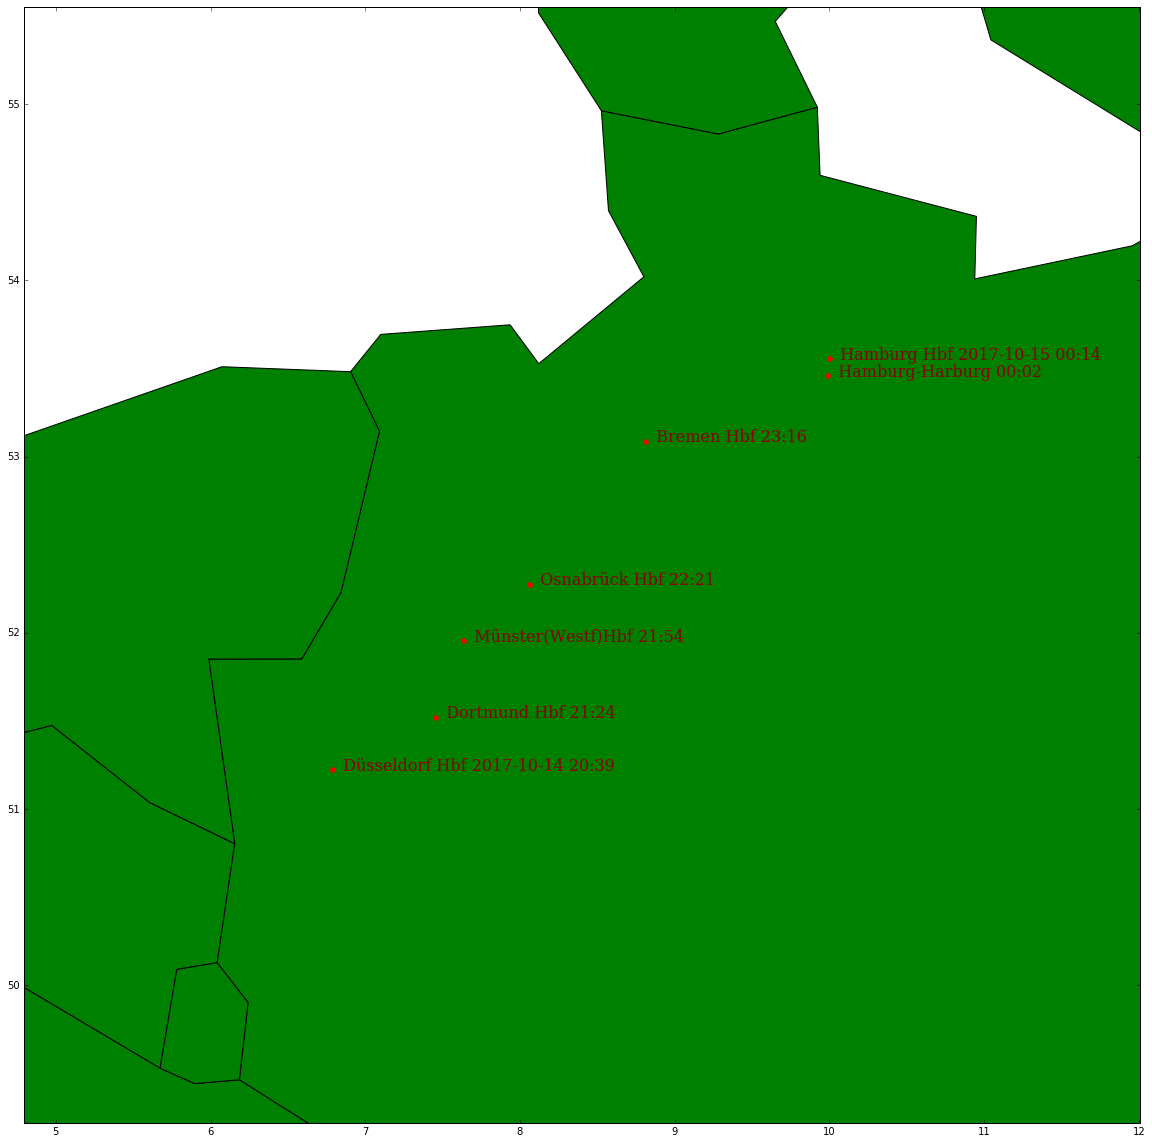

In [58]:
fig,ax = plt.subplots()

df_world_map.plot(ax = ax,color = 'green')
geo_df.plot(ax = ax,color = 'red')

geo_df.apply(func = plot_station_names,axis = 1,args = (ax,))

bounds = geo_df.geometry.bounds
a = ax.set_xlim([bounds.minx.min()-2, bounds.maxx.max()+2])
a = ax.set_ylim([bounds.miny.min()-2, bounds.maxy.max()+2])
